In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import pickle

In [2]:
Anomaly = pd.read_csv("dataset_final.csv")
print(Anomaly.head())

         Time  Temperature  Humidity  Air Quality  Light  Loudness
0  1623781306        37.94     28.94           75    644       106
1  1623781316        37.94     29.00           75    645       145
2  1623781326        37.88     28.88           75    644       146
3  1623781336        37.72     28.94           75    646       139
4  1623781346        37.69     29.19           75    644       155


In [3]:
# Let's drop the column which we are not using for the project

Anomaly.drop("Time", axis=1)
Anomaly_df = Anomaly
print(Anomaly_df.head())


         Time  Temperature  Humidity  Air Quality  Light  Loudness
0  1623781306        37.94     28.94           75    644       106
1  1623781316        37.94     29.00           75    645       145
2  1623781326        37.88     28.88           75    644       146
3  1623781336        37.72     28.94           75    646       139
4  1623781346        37.69     29.19           75    644       155


In [4]:
X = Anomaly_df.values
print(X)

[[1.62378131e+09 3.79400000e+01 2.89400000e+01 7.50000000e+01
  6.44000000e+02 1.06000000e+02]
 [1.62378132e+09 3.79400000e+01 2.90000000e+01 7.50000000e+01
  6.45000000e+02 1.45000000e+02]
 [1.62378133e+09 3.78800000e+01 2.88800000e+01 7.50000000e+01
  6.44000000e+02 1.46000000e+02]
 ...
 [1.62384686e+09 2.62200000e+01 5.73800000e+01 7.50000000e+01
  6.30000000e+02 1.42000000e+02]
 [1.62384687e+09 2.62200000e+01 5.73100000e+01 7.50000000e+01
  6.30000000e+02 1.27000000e+02]
 [1.62384688e+09 2.62200000e+01 5.73800000e+01 7.50000000e+01
  6.30000000e+02 1.32000000e+02]]


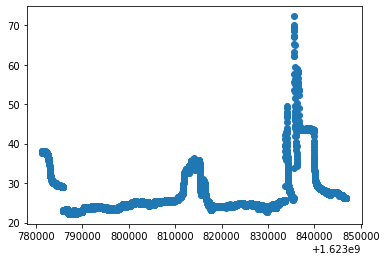

In [5]:
# Let's plot our dataset using the scatter plot

plt.scatter(X[:, 0], X[:,1])
plt.show()

In [6]:
# let train our model using one the best algorithms for anomaly detection

classifier = IsolationForest(contamination=0.1, max_samples="auto", n_estimators=50)
classifier.fit(X)
prediction = classifier.predict(X)


In [8]:
pickle.dump(classifier, open("model.pkl", "wb"))